# **Import**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sherpa_contrib.profiles import *
from sherpa.astro.ui import *

import warnings
warnings.filterwarnings('ignore')

clean()
set_stat("wstat")
set_method("levmar")
set_covar_opt("sigma", 1.0)

set_xsabund("lpgs")
set_xsxsect("vern")
set_xscosmo(70, 0, 0.73)

 Solar Abundance Vector set to lpgs:  Lodders K., Palme H., Gail H.P., Landolt-Börnstein, New Series, vol VI/4B, pp 560–630 (2009) (Proto-solar)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996


# **Single spectrum**

In [2]:
load_data(1, "spectra/box1_src1.grp")
load_arf(1, "spectra/box1_src1.arf")
load_rmf(1, "spectra/box1_src1.rmf")
load_bkg(1, "spectra/box1_bkg1.pi")

Emin, Emax = 0.5, 7.0
ignore_id(1, f":{Emin},{Emax}:")

print("\nExposure time (ACIS-S):", get_exposure(1))

read ARF file spectra/box1_src1.arf
read RMF file spectra/box1_src1.rmf
read background file spectra/box1_bkg1.pi
dataset 1: 0.0073:14.9504 -> 0.5256:14.9504 Energy (keV)
dataset 1: 0.5256:14.9504 -> 0.5256:6.9058 Energy (keV)

Exposure time (ACIS-S): 46565.044805045


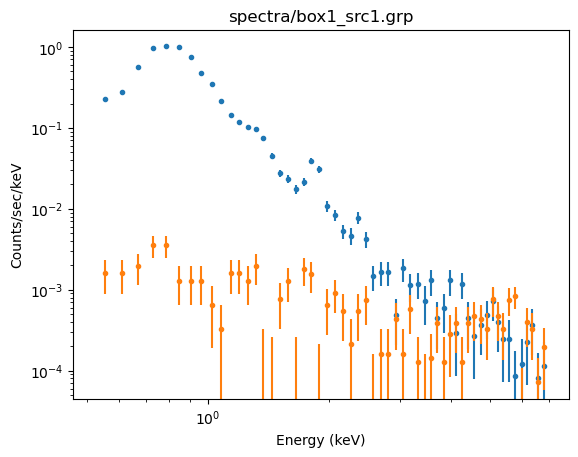

In [3]:
plot_data(1, xlog=True, ylog=True)
plot_bkg(1, overplot=True)

In [4]:
# initial values
nh = 0.0182
z = 0.0031
kT = 0.6
abund = 0.6
norm = 1e-4

set_source(1, xsphabs.gal * (xsapec.t1))

gal.nh = nh
t1.kT = kT
t1.redshift = z
t1.abundanc = abund
t1.norm = norm

In [5]:
get_model(1)

<RSPModelPHA model instance 'apply_rmf(apply_arf((46565.044805045 * (xsphabs.gal * xsapec.t1))))'>

In [6]:
freeze(gal.nh)
get_model(1)

<RSPModelPHA model instance 'apply_rmf(apply_arf((46565.044805045 * (xsphabs.gal * xsapec.t1))))'>

In [7]:
fit(1)

Reading APEC data from 3.0.9

Dataset               = 1
Method                = levmar
Statistic             = wstat
Initial fit statistic = 21609
Final fit statistic   = 162.839 at function evaluation 19
Data points           = 56
Degrees of freedom    = 54
Probability [Q-value] = 7.53051e-13
Reduced statistic     = 3.01554
Change in statistic   = 21446.2
   t1.kT          0.633517     +/- 0.00468665  
   t1.norm        0.000731274  +/- 5.61363e-06 


In [8]:
thaw(t1.abundanc)
fit()

Dataset               = 1
Method                = levmar
Statistic             = wstat
Initial fit statistic = 162.839
Final fit statistic   = 146.352 at function evaluation 22
Data points           = 56
Degrees of freedom    = 53
Probability [Q-value] = 1.11394e-10
Reduced statistic     = 2.76137
Change in statistic   = 16.4868
   t1.kT          0.635933     +/- 0.00481861  
   t1.Abundanc    0.467947     +/- 0.0271399   
   t1.norm        0.000895391  +/- 4.1858e-05  


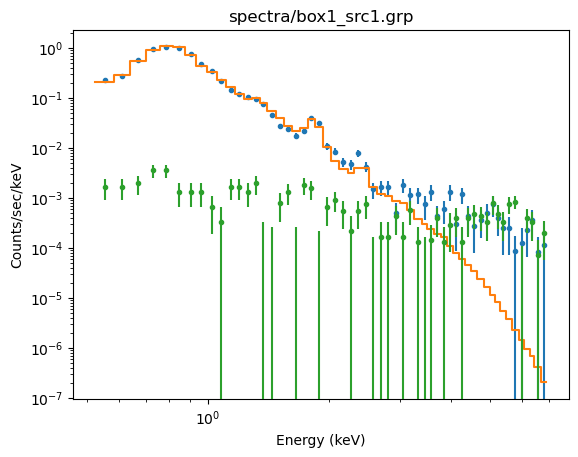

In [9]:
plot_fit(1, xlog=True, ylog=True)
plot_bkg(1, overplot=True)

In [10]:
res = covar()
res

Dataset               = 1
Confidence Method     = covariance
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = wstat
covariance 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   t1.kT            0.635933  -0.00478249   0.00478249
   t1.Abundanc      0.467947   -0.0270139    0.0270139
   t1.norm       0.000895391 -4.16889e-05  4.16889e-05


# **Multiple spectra**

In [11]:
clean()
load_data(1, "spectra/box1_src1.grp")
load_arf(1, "spectra/box1_src1.arf")
load_rmf(1, "spectra/box1_src1.rmf")
load_bkg(1, "spectra/box1_bkg1.pi")

load_data(2, "spectra/box1_src3.grp")
load_arf(2, "spectra/box1_src3.arf")
load_rmf(2, "spectra/box1_src3.rmf")
load_bkg(2, "spectra/box1_bkg3.pi")

Emin, Emax = 0.5, 7.0
ignore_id(1, f":{Emin},{Emax}:")
ignore_id(2, f":{Emin},{Emax}:")

print("\nExposure time (ACIS-S):", get_exposure(1))
print("Exposure time (ACIS-I):", get_exposure(2))

read ARF file spectra/box1_src1.arf
read RMF file spectra/box1_src1.rmf
read background file spectra/box1_bkg1.pi
read ARF file spectra/box1_src3.arf
read RMF file spectra/box1_src3.rmf
read background file spectra/box1_bkg3.pi
dataset 1: 0.0073:14.9504 -> 0.5256:14.9504 Energy (keV)
dataset 1: 0.5256:14.9504 -> 0.5256:6.9058 Energy (keV)
dataset 2: 0.0073:14.9504 -> 0.5256:14.9504 Energy (keV)
dataset 2: 0.5256:14.9504 -> 0.5256:6.862 Energy (keV)

Exposure time (ACIS-S): 46565.044805045
Exposure time (ACIS-I): 74365.18296773


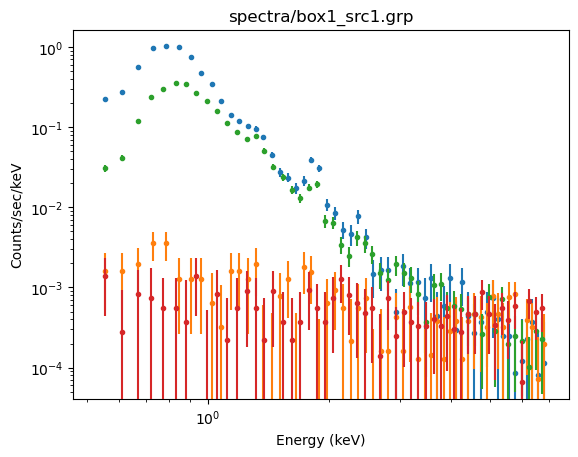

In [12]:
plot_data(1, xlog=True, ylog=True)
plot_bkg(1, overplot=True)
plot_data(2, overplot=True)
plot_bkg(2, overplot=True)

In [13]:
# initial values
nh = 0.0182
z = 0.0031
kT = 0.6
abund = 0.6
norm = 1e-4

set_source(1, xsphabs.gal1 * (xsapec.t1))
set_source(2, xsphabs.gal2 * (xsapec.t2))

gal1.nh = nh
t1.kT = kT
t1.redshift = z
t1.abundanc = abund
t1.norm = norm

gal2.nh = nh
t2.kT = kT
t2.redshift = z
t2.abundanc = abund
t2.norm = norm

link(gal2.nh, gal1.nh)
link(t2.kT, t1.kT)
link(t2.abundanc, t1.abundanc)
link(t2.norm, t1.norm)

freeze(gal1.nh)

In [14]:
get_model(2)

<RSPModelPHA model instance 'apply_rmf(apply_arf((74365.18296773 * (xsphabs.gal2 * xsapec.t2))))'>

In [15]:
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 20680.4
Final fit statistic   = 287.241 at function evaluation 16
Data points           = 108
Degrees of freedom    = 106
Probability [Q-value] = 1.22357e-18
Reduced statistic     = 2.70982
Change in statistic   = 20393.1
   t1.kT          0.635952     +/- 0.00399652  
   t1.norm        0.000714368  +/- 4.62707e-06 


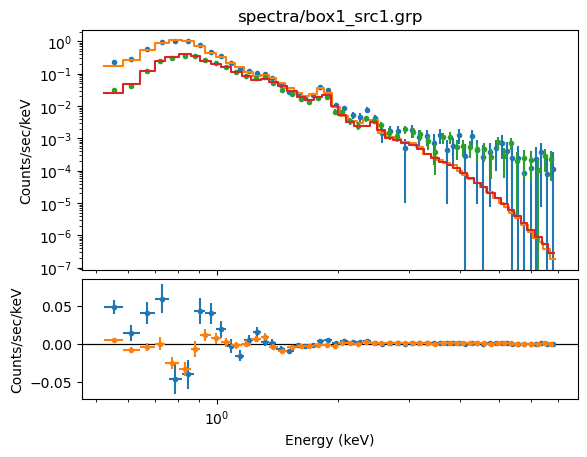

In [16]:
plot_fit_resid(1, xlog=True, ylog=True)
plot_fit_resid(2, overplot=True)

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 287.241
Final fit statistic   = 277.617 at function evaluation 22
Data points           = 108
Degrees of freedom    = 105
Probability [Q-value] = 1.59072e-17
Reduced statistic     = 2.64397
Change in statistic   = 9.6241
   t1.kT          0.635765     +/- 0.0040325   
   t1.Abundanc    0.503438     +/- 0.026914    
   t1.norm        0.000826302  +/- 3.63644e-05 


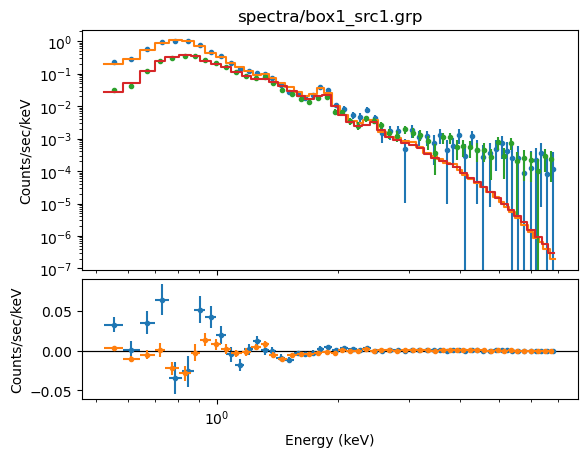

In [17]:
thaw(t1.abundanc)
fit()

plot_fit_resid(1, xlog=True, ylog=True)
plot_fit_resid(2, overplot=True)

# **VAPEC model**

In [18]:
clean()
load_data(1, "spectra/box1_src1.grp")
load_arf(1, "spectra/box1_src1.arf")
load_rmf(1, "spectra/box1_src1.rmf")
load_bkg(1, "spectra/box1_bkg1.pi")

load_data(2, "spectra/box1_src3.grp")
load_arf(2, "spectra/box1_src3.arf")
load_rmf(2, "spectra/box1_src3.rmf")
load_bkg(2, "spectra/box1_bkg3.pi")

Emin, Emax = 0.5, 7.0
ignore_id(1, f":{Emin},{Emax}:")
ignore_id(2, f":{Emin},{Emax}:")

print("\nExposure time (ACIS-S):", get_exposure(1))
print("Exposure time (ACIS-I):", get_exposure(2))

read ARF file spectra/box1_src1.arf
read RMF file spectra/box1_src1.rmf
read background file spectra/box1_bkg1.pi
read ARF file spectra/box1_src3.arf
read RMF file spectra/box1_src3.rmf
read background file spectra/box1_bkg3.pi
dataset 1: 0.0073:14.9504 -> 0.5256:14.9504 Energy (keV)
dataset 1: 0.5256:14.9504 -> 0.5256:6.9058 Energy (keV)
dataset 2: 0.0073:14.9504 -> 0.5256:14.9504 Energy (keV)
dataset 2: 0.5256:14.9504 -> 0.5256:6.862 Energy (keV)

Exposure time (ACIS-S): 46565.044805045
Exposure time (ACIS-I): 74365.18296773


In [19]:
# initial values
nh = 0.0182
z = 0.0031
kT = 0.6
abund = 0.6
norm = 1e-4

set_source(1, xsphabs.gal1 * (xsvapec.t1))
set_source(2, xsphabs.gal2 * (xsvapec.t2))

gal1.nh = nh
t1.kT = kT
t1.redshift = z
for el in ["Fe", "C", "N", "O", "Ne", "Mg", "Al", "Si", "S", "Ar", "Ca", "Ni"]:
    set_par(f"t1.{el}", val=abund, frozen=True)
t1.norm = norm

gal2.nh = nh
t2.kT = kT
t2.redshift = z
for el in ["Fe", "C", "N", "O", "Ne", "Mg", "Al", "Si", "S", "Ar", "Ca", "Ni"]:
    set_par(f"t2.{el}", val=abund, frozen=True)
t2.norm = norm

link(gal2.nh, gal1.nh)
link(t2.kT, t1.kT)
for el in ["Fe", "C", "N", "O", "Ne", "Mg", "Al", "Si", "S", "Ar", "Ca", "Ni"]:
    link(f"t2.{el}", f"t1.{el}")
link(t2.norm, t1.norm)

freeze(gal1.nh)

In [20]:
get_model(1)

<RSPModelPHA model instance 'apply_rmf(apply_arf((46565.044805045 * (xsphabs.gal1 * xsvapec.t1))))'>

In [21]:
get_model(2)

<RSPModelPHA model instance 'apply_rmf(apply_arf((74365.18296773 * (xsphabs.gal2 * xsvapec.t2))))'>

In [22]:
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 20680.4
Final fit statistic   = 287.241 at function evaluation 16
Data points           = 108
Degrees of freedom    = 106
Probability [Q-value] = 1.22357e-18
Reduced statistic     = 2.70982
Change in statistic   = 20393.1
   t1.kT          0.635952     +/- 0.00399652  
   t1.norm        0.000714368  +/- 4.62707e-06 


In [23]:
thaw(t1.Fe)
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 287.241
Final fit statistic   = 282.129 at function evaluation 17
Data points           = 108
Degrees of freedom    = 105
Probability [Q-value] = 3.78873e-18
Reduced statistic     = 2.68694
Change in statistic   = 5.11227
   t1.kT          0.632986     +/- 0.0041724   
   t1.Fe          0.568298     +/- 0.0133752   
   t1.norm        0.000740222  +/- 1.2148e-05  


In [24]:
thaw(t1.Mg)
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 282.129
Final fit statistic   = 250.36 at function evaluation 21
Data points           = 108
Degrees of freedom    = 104
Probability [Q-value] = 4.38542e-14
Reduced statistic     = 2.40731
Change in statistic   = 31.7684
   t1.kT          0.635407     +/- 0.00423946  
   t1.Mg          0.379669     +/- 0.0362566   
   t1.Fe          0.512692     +/- 0.0148449   
   t1.norm        0.000799017  +/- 1.61062e-05 


In [25]:
thaw(t1.Si)
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 250.36
Final fit statistic   = 241.551 at function evaluation 19
Data points           = 108
Degrees of freedom    = 103
Probability [Q-value] = 3.82741e-13
Reduced statistic     = 2.34516
Change in statistic   = 8.80899
   t1.kT          0.638368     +/- 0.00438909  
   t1.Mg          0.352132     +/- 0.0360488   
   t1.Si          0.46692      +/- 0.0433549   
   t1.Fe          0.491795     +/- 0.0156067   
   t1.norm        0.000822819  +/- 1.79888e-05 


In [26]:
thaw(t1.S)
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 241.551
Final fit statistic   = 238.368 at function evaluation 22
Data points           = 108
Degrees of freedom    = 102
Probability [Q-value] = 6.29268e-13
Reduced statistic     = 2.33694
Change in statistic   = 3.1839
   t1.kT          0.637497     +/- 0.00439838  
   t1.Mg          0.361149     +/- 0.0368224   
   t1.Si          0.471639     +/- 0.0439689   
   t1.S           0.8977       +/- 0.169181    
   t1.Fe          0.498315     +/- 0.0163077   
   t1.norm        0.000814908  +/- 1.85091e-05 


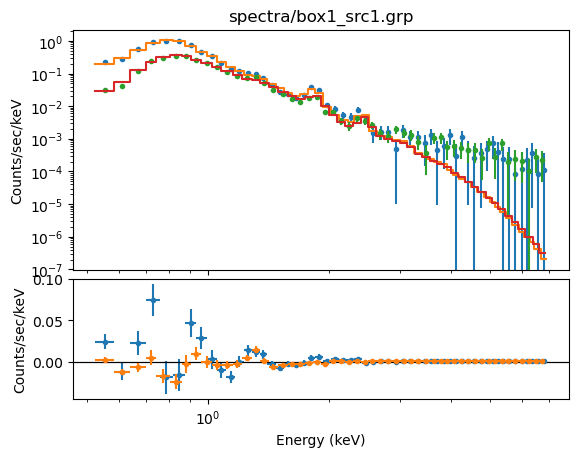

In [27]:
plot_fit_resid(1, xlog=True, ylog=True)
plot_fit_resid(2, overplot=True)

In [28]:
# unlink norm2 - due to possible cross-calibration issues between observations, but difference is negligible
unlink(t2.norm)
fit()

Datasets              = 1, 2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 8132.55
Final fit statistic   = 221.64 at function evaluation 33
Data points           = 108
Degrees of freedom    = 101
Probability [Q-value] = 5.00296e-11
Reduced statistic     = 2.19445
Change in statistic   = 7910.91
   t1.kT          0.640052     +/- 0.00444608  
   t1.Mg          0.369183     +/- 0.0372804   
   t1.Si          0.477364     +/- 0.0441934   
   t1.S           0.894331     +/- 0.169146    
   t1.Fe          0.499678     +/- 0.0163351   
   t1.norm        0.000828568  +/- 1.90728e-05 
   t2.norm        0.000786983  +/- 1.91856e-05 


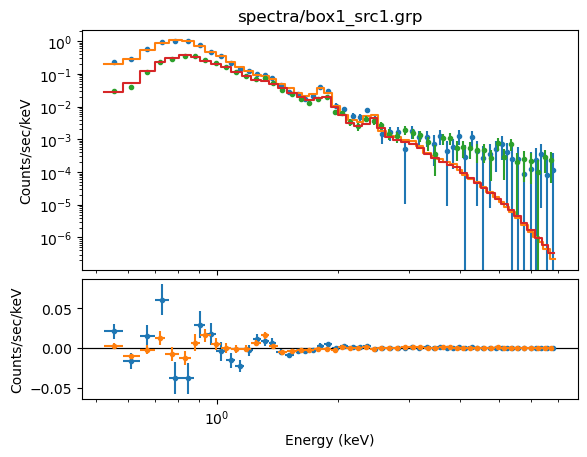

In [29]:
plot_fit_resid(1, xlog=True, ylog=True)
plot_fit_resid(2, overplot=True)